In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = 'data/'

In [3]:
products = pd.read_csv(f'{PATH}amazon_baby_subset.csv')

In [5]:
products = products.fillna({'review':''})

In [6]:
def remove_punctuation(text):
    import string
    return text.translate(str.maketrans('', '', string.punctuation)) 

products['review_clean'] = products['review'].apply(remove_punctuation)

In [11]:
import json
f = open(f'{PATH}important_words.json')
important_words = json.load(f)
f = open(f'{PATH}module-4-assignment-train-idx.json')
train_ids = json.load(f)
f = open(f'{PATH}module-4-assignment-validation-idx.json')
validation_ids = json.load(f)
f.close()

In [8]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [15]:
train_data = products.iloc[train_ids]

In [16]:
validation_data = products.iloc[validation_ids]

In [17]:
validation_data

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1,It has been many years since we needed diaper ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Fisher Price Nesting Action Vehicles,For well over a year my son has enjoyed stacki...,5,1,For well over a year my son has enjoyed stacki...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Sassy Who Loves Baby? Photo Album Book with te...,I bought this for a new granddaughter. I will...,5,1,I bought this for a new granddaughter I will ...,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Earlyears: Earl E. Bird with Teething Rings,We received an Earl E. Bird as a gift when we ...,5,1,We received an Earl E Bird as a gift when we h...,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53053,Merry Muscles Ergonomic Jumper Exerciser Baby ...,"once in this thing, my 2mo. son loves this... ...",2,-1,once in this thing my 2mo son loves this howev...,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53059,K&amp;C Baby Bath Seat Support Sling Shower Me...,Absolute rip off!!! Not impressed at all this ...,1,-1,Absolute rip off Not impressed at all this was...,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
53063,Umai Authentic Hazelwood and CHERRY RAW (Unpol...,Made no difference :/,1,-1,Made no difference,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53068,"Mud Pie Milestone Stickers, Boy",Pretty please open and inspect these stickers ...,1,-1,Pretty please open and inspect these stickers ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_data

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1,Beautiful book I love it to record cherished t...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53065,Summer Infant Pop 'n Play Portable Playard,Good idea but too dangerous. I really wanted t...,2,-1,Good idea but too dangerous I really wanted to...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53066,Freeens Cool Seat Liner Breathing with 3d Mesh...,It doesn't stay input. My daughter was sliding...,1,-1,It doesnt stay input My daughter was sliding o...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53067,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,-1,My infant goes to a really crappy daycare and ...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53069,Best BIB for Baby - Soft Bib (Pink-Elephant),Great 5-Star Product but An Obvious knock-off ...,1,-1,Great 5Star Product but An Obvious knockoff of...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def get_numpy_data(df,features,label):
    df['constant'] = 1
    features = ['constant'] + features
    features_frame = df[features]
    features_matrix = features_frame.to_numpy()
    label_series = df[label]
    label_array = label_series.to_numpy()
    return features_matrix,label_array

In [21]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
'''
produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1 / (1 + np.exp(-score))
    
    # return predictions
    return predictions

In [27]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    derivative = np.dot(feature,errors)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        derivative -= 2*l2_penalty*coefficient
        
    return derivative

### In the code above, the intercept term was not regularized

In [28]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

### The term with L2 regularization decreases ll(w)

In [30]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        predictions = predict_probability(feature_matrix,coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            derivative = feature_derivative_with_L2(errors,feature_matrix[:,j],coefficients[j],l2_penalty,is_intercept)
            
            # add the step size times the derivative to the current coefficient
            coefficients[j] += step_size*derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

In [32]:
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,0,501)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [33]:
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,4,501)

iteration   0: log likelihood of observed labels = -29179.39508175
iteration   1: log likelihood of observed labels = -29003.73417180
iteration   2: log likelihood of observed labels = -28834.71441858
iteration   3: log likelihood of observed labels = -28671.80345068
iteration   4: log likelihood of observed labels = -28514.58077957
iteration   5: log likelihood of observed labels = -28362.69830317
iteration   6: log likelihood of observed labels = -28215.85663259
iteration   7: log likelihood of observed labels = -28073.79071393
iteration   8: log likelihood of observed labels = -27936.26093762
iteration   9: log likelihood of observed labels = -27803.04751805
iteration  10: log likelihood of observed labels = -27673.94684207
iteration  11: log likelihood of observed labels = -27548.76901327
iteration  12: log likelihood of observed labels = -27427.33612958
iteration  13: log likelihood of observed labels = -27309.48101569
iteration  14: log likelihood of observed labels = -27195.0462

In [34]:
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,10,501)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29003.76654163
iteration   2: log likelihood of observed labels = -28834.79322654
iteration   3: log likelihood of observed labels = -28671.94687528
iteration   4: log likelihood of observed labels = -28514.80571589
iteration   5: log likelihood of observed labels = -28363.02048079
iteration   6: log likelihood of observed labels = -28216.29071186
iteration   7: log likelihood of observed labels = -28074.35036891
iteration   8: log likelihood of observed labels = -27936.95892966
iteration   9: log likelihood of observed labels = -27803.89576265
iteration  10: log likelihood of observed labels = -27674.95647005
iteration  11: log likelihood of observed labels = -27549.95042714
iteration  12: log likelihood of observed labels = -27428.69905549
iteration  13: log likelihood of observed labels = -27311.03455140
iteration  14: log likelihood of observed labels = -27196.7989

In [35]:
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,1e2,501)

iteration   0: log likelihood of observed labels = -29179.48385120
iteration   1: log likelihood of observed labels = -29004.25177457
iteration   2: log likelihood of observed labels = -28835.97382190
iteration   3: log likelihood of observed labels = -28674.09410083
iteration   4: log likelihood of observed labels = -28518.17112932
iteration   5: log likelihood of observed labels = -28367.83774654
iteration   6: log likelihood of observed labels = -28222.77708939
iteration   7: log likelihood of observed labels = -28082.70799392
iteration   8: log likelihood of observed labels = -27947.37595368
iteration   9: log likelihood of observed labels = -27816.54738615
iteration  10: log likelihood of observed labels = -27690.00588850
iteration  11: log likelihood of observed labels = -27567.54970126
iteration  12: log likelihood of observed labels = -27448.98991327
iteration  13: log likelihood of observed labels = -27334.14912742
iteration  14: log likelihood of observed labels = -27222.8604

In [36]:
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,1e3,501)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29009.07176112
iteration   2: log likelihood of observed labels = -28847.62378912
iteration   3: log likelihood of observed labels = -28695.14439397
iteration   4: log likelihood of observed labels = -28550.95060743
iteration   5: log likelihood of observed labels = -28414.45771129
iteration   6: log likelihood of observed labels = -28285.15124375
iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.4242

In [37]:
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,1e5,501)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.71006589
iteration   2: log likelihood of observed labels = -29271.65738833
iteration   3: log likelihood of observed labels = -29271.61189923
iteration   4: log likelihood of observed labels = -29271.57079975
iteration   5: log likelihood of observed labels = -29271.53358505
iteration   6: log likelihood of observed labels = -29271.49988440
iteration   7: log likelihood of observed labels = -29271.46936584
iteration   8: log likelihood of observed labels = -29271.44172890
iteration   9: log likelihood of observed labels = -29271.41670149
iteration  10: log likelihood of observed labels = -29271.39403722
iteration  11: log likelihood of observed labels = -29271.37351294
iteration  12: log likelihood of observed labels = -29271.35492661
iteration  13: log likelihood of observed labels = -29271.33809523
iteration  14: log likelihood of observed labels = -29271.3228

In [43]:
coefficients_0_penalty.argsort()

array([106,  97, 114, 113, 169, 172,  78, 100, 176, 134,  33, 160, 140,
       181, 102,  67, 103, 174, 123,  99, 108,   6, 104, 186, 167,  50,
        29,  19, 146, 107, 157, 156, 159, 130, 193,  70, 105, 170, 112,
       132, 101, 135, 122, 185,  13, 183,  44, 175, 109, 165,  47,  98,
       131,  94,  69, 191,  57, 164,  18, 148, 125,  40, 179, 141, 188,
       137,  37, 177, 161,  53, 180,  80,  39, 133, 166, 178, 117,  10,
        68, 139,  79, 151, 126, 138, 150, 121,  17, 154, 116,  26, 119,
         0, 152,  85, 128, 149,  92,  54, 115, 118, 171,  32,  61,  24,
       144, 168, 192, 111,  15, 136, 163,  22, 173,  36,  73,   7,  25,
       120,   5, 127, 182, 190,  82, 129,   2, 147, 155,  60, 158,  43,
        38,  42, 124, 189, 142,  77, 184,  59, 143, 110, 153,   1,  46,
        96,  75,  30,  65,  49,  90, 145,  64,  93,  41,  63,  16,  86,
        66, 162,  74,  20,  62,  14,  55, 187,  72,  95,  56,  28,  27,
        87,  89,  11,  58,  81,  51,  21,  45,  71,  84,  88,  5

In [51]:
for index in coefficients_0_penalty.argsort():
    print(important_words[index-1])

disappointed
money
return
waste
returned
broke
work
thought
idea
cheap
even
difficult
bad
working
item
way
hard
stay
received
tried
something
would
plastic
completely
company
buy
back
product
design
reviews
box
piece
trying
open
either
better
however
maybe
cup
away
never
worked
try
picture
get
unit
month
instead
going
anything
could
monitor
bottom
another
thing
tub
small
started
bought
weeks
times
fit
less
part
buying
ordered
two
head
together
made
went
right
got
actually
last
said
top
seat
quality
milk
purchased
look
chair
came
wanted
water
time
looks
different
months
problem
either
place
toy
hold
say
see
child
amazon
want
took
first
make
stroller
cover
come
almost
bottle
really
getting
give
much
makes
bag
new
like
put
know
use
find
high
won
side
gate
one
looking
second
big
pretty
enough
using
diaper
sure
babies
worth
bottles
seems
year
found
pump
purchase
baby
go
day
cute
used
crib
since
long
many
think
us
around
easily
son
able
clean
though
every
good
take
also
keep
wish
set
play
si

In [53]:
table = pd.DataFrame({'word': ['(intercept)'] + important_words})

In [59]:
table['0'] = coefficients_0_penalty
table['4'] = coefficients_4_penalty
table['10'] = coefficients_10_penalty
table['1e2'] = coefficients_1e2_penalty
table['1e3'] = coefficients_1e3_penalty
table['1e5'] = coefficients_1e5_penalty

In [61]:
table

,word,0,4,10,1e2,1e3,1e5
0,(intercept),-0.063742,-0.063143,-0.062256,-0.050438,0.000054,0.011362
1,baby,0.074073,0.073994,0.073877,0.072360,0.059752,0.001784
2,one,0.012753,0.012495,0.012115,0.007247,-0.008761,-0.001827
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
...,...,...,...,...,...,...,...
189,babies,0.052494,0.052130,0.051594,0.044805,0.021026,0.000365
190,won,0.004960,0.004907,0.004830,0.003848,0.001084,0.000017
191,tub,-0.166745,-0.165367,-0.163338,-0.137693,-0.054778,-0.000936
192,almost,-0.031916,-0.031621,-0.031186,-0.025604,-0.007361,-0.000125


In [52]:
positive_words = ['love','loves','easy','perfect','great']
negative_words = ['disappointed','money','return','waste','returned']

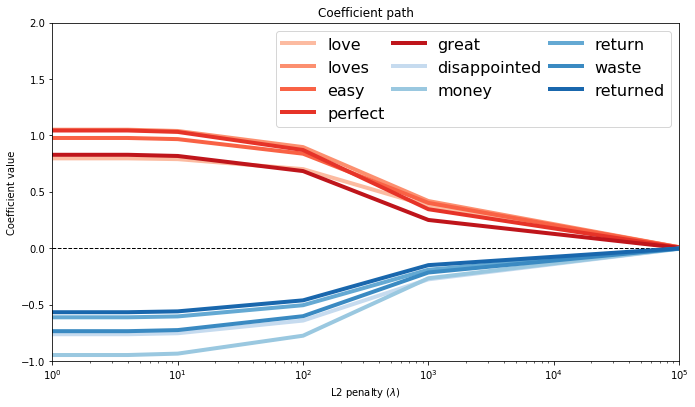

In [64]:
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])


In [71]:
train_probability_predictions = predict_probability(feature_matrix_train,coefficients_0_penalty)
for i in range(len(train_probability_predictions)):
    if train_probability_predictions[i] > 0.5:
        train_probability_predictions[i] = 1
    else:
        train_probability_predictions[i] = -1
print(np.sum(train_probability_predictions==sentiment_train)/len(train_probability_predictions))

0.7851561577866434


In [72]:
train_probability_predictions = predict_probability(feature_matrix_train,coefficients_4_penalty)
for i in range(len(train_probability_predictions)):
    if train_probability_predictions[i] > 0.5:
        train_probability_predictions[i] = 1
    else:
        train_probability_predictions[i] = -1
print(np.sum(train_probability_predictions==sentiment_train)/len(train_probability_predictions))

0.7851089445480512


In [73]:
train_probability_predictions = predict_probability(feature_matrix_train,coefficients_10_penalty)
for i in range(len(train_probability_predictions)):
    if train_probability_predictions[i] > 0.5:
        train_probability_predictions[i] = 1
    else:
        train_probability_predictions[i] = -1
print(np.sum(train_probability_predictions==sentiment_train)/len(train_probability_predictions))

0.7849909114515711


In [74]:
train_probability_predictions = predict_probability(feature_matrix_train,coefficients_1e2_penalty)
for i in range(len(train_probability_predictions)):
    if train_probability_predictions[i] > 0.5:
        train_probability_predictions[i] = 1
    else:
        train_probability_predictions[i] = -1
print(np.sum(train_probability_predictions==sentiment_train)/len(train_probability_predictions))

0.7839758268218409


In [75]:
train_probability_predictions = predict_probability(feature_matrix_train,coefficients_1e3_penalty)
for i in range(len(train_probability_predictions)):
    if train_probability_predictions[i] > 0.5:
        train_probability_predictions[i] = 1
    else:
        train_probability_predictions[i] = -1
print(np.sum(train_probability_predictions==sentiment_train)/len(train_probability_predictions))

0.7758551497839994


In [76]:
train_probability_predictions = predict_probability(feature_matrix_train,coefficients_1e5_penalty)
for i in range(len(train_probability_predictions)):
    if train_probability_predictions[i] > 0.5:
        train_probability_predictions[i] = 1
    else:
        train_probability_predictions[i] = -1
print(np.sum(train_probability_predictions==sentiment_train)/len(train_probability_predictions))

0.6803663747314747


### L2=0 model has highest accuracy on the training data

In [77]:
valid_probability_predictions = predict_probability(feature_matrix_valid,coefficients_0_penalty)
for i in range(len(valid_probability_predictions)):
    if valid_probability_predictions[i] > 0.5:
        valid_probability_predictions[i] = 1
    else:
        valid_probability_predictions[i] = -1
print(np.sum(valid_probability_predictions==sentiment_valid)/len(valid_probability_predictions))

0.781439641490057


In [78]:
valid_probability_predictions = predict_probability(feature_matrix_valid,coefficients_4_penalty)
for i in range(len(valid_probability_predictions)):
    if valid_probability_predictions[i] > 0.5:
        valid_probability_predictions[i] = 1
    else:
        valid_probability_predictions[i] = -1
print(np.sum(valid_probability_predictions==sentiment_valid)/len(valid_probability_predictions))

0.7815330034543927


In [79]:
valid_probability_predictions = predict_probability(feature_matrix_valid,coefficients_10_penalty)
for i in range(len(valid_probability_predictions)):
    if valid_probability_predictions[i] > 0.5:
        valid_probability_predictions[i] = 1
    else:
        valid_probability_predictions[i] = -1
print(np.sum(valid_probability_predictions==sentiment_valid)/len(valid_probability_predictions))

0.7817197273830642


In [80]:
valid_probability_predictions = predict_probability(feature_matrix_valid,coefficients_1e2_penalty)
for i in range(len(valid_probability_predictions)):
    if valid_probability_predictions[i] > 0.5:
        valid_probability_predictions[i] = 1
    else:
        valid_probability_predictions[i] = -1
print(np.sum(valid_probability_predictions==sentiment_valid)/len(valid_probability_predictions))

0.781066193632714


In [81]:
valid_probability_predictions = predict_probability(feature_matrix_valid,coefficients_1e3_penalty)
for i in range(len(valid_probability_predictions)):
    if valid_probability_predictions[i] > 0.5:
        valid_probability_predictions[i] = 1
    else:
        valid_probability_predictions[i] = -1
print(np.sum(valid_probability_predictions==sentiment_valid)/len(valid_probability_predictions))

0.7713565493417982


In [82]:
valid_probability_predictions = predict_probability(feature_matrix_valid,coefficients_1e5_penalty)
for i in range(len(valid_probability_predictions)):
    if valid_probability_predictions[i] > 0.5:
        valid_probability_predictions[i] = 1
    else:
        valid_probability_predictions[i] = -1
print(np.sum(valid_probability_predictions==sentiment_valid)/len(valid_probability_predictions))

0.667818130893474


### L2=10 has highest accuracy on the validation data

### Highest accuracy on the training data does not imply that the model is the best one!